In [222]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
%matplotlib inline
from dotenv import load_dotenv

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

In [298]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX")

px.set_mapbox_access_token(mapbox_token)

In [299]:
#Import the CSVs to Pandas DataFrames
file_path = Path("C:/Users/johnh/Desktop/PREWORK_JSH/Module-6/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.columns = ['neighborhood','sale_price_sqr_foot','housing_units','gross_rent']



In [300]:
# Define Panel Visualization Functions

sfo_housing_units = sfo_data.groupby(['year']).mean()
sfo_housing_units= sfo_housing_units.drop(columns=['sale_price_sqr_foot','gross_rent'])

def housing_units_per_year():

    fig_housing_units= plt.figure()
    plot_housing_units=sfo_housing_units.plot.bar(ylim=(370000,387500),title = 'Housing Units in San Francisco from 2010 to 2016')
    plot_housing_units.set_xlabel('Year',fontsize=12)
    plot_housing_units.set_ylabel('Units',fontsize=12)
    plt.close(fig_housing_units)
    return pn.pane.Matplotlib(fig_housing_units, tight=True)
    

In [301]:
#avg gross rent per neighborhood 

grossrent_salesprice_sqft = sfo_data.groupby(['year']).mean()
grossrent_salesprice_sqft.drop(columns=['housing_units'],inplace=True)
avg_gross_rent = grossrent_salesprice_sqft.drop(columns = ['sale_price_sqr_foot'])

def average_gross_rent():

    fig_avg_gross_rent= plt.figure()
    gross_rent = avg_gross_rent.plot.line(title = 'Avg Gross Rent in SFO')
    gross_rent.set_xlabel('Year',fontsize=12)
    gross_rent.set_ylabel('Avg Gross Rent',fontsize=12)
    plt.show()
    plt.close(fig_avg_gross_rent)
    return pn.pane.Matplotlib(fig_avg_gross_rent, tight=True)

In [302]:
# average sales price per neighborhood

def average_sales_price():
    
    fig_avg_sales_price = plt.figure()
    asp = grossrent_salesprice_sqft.plot.line(title = 'Avg sale price per sqft in SFO')
    asp.set_xlabel('Year',fontsize=12)
    asp.set_ylabel('Avg sales price',fontsize=12)
    plt.show()
    plt.close(fig_avg_sales_price)
    return pn.pane.Matplotlib(fig_avg_sales_price, tight=True)

In [303]:
#avg price per neighborhood
neighborhood_sales_price_sqr_footdf = sfo_data.groupby(['neighborhood','year']).mean()

def average_price_by_neighborhood():
    nhp = neighborhood_sales_price_sqr_footdf.hvplot.line(x ='year',y='sale_price_sqr_foot',groupby='neighborhood',xlabel='Year',ylabel='Avg.Sale Price per Sq Ft')
    return nhp
    


In [304]:
# showing historical data on most exp neighborhoods
averagedf = sfo_data.groupby(['neighborhood']).mean()
most_exp = averagedf.drop(columns = ['housing_units','gross_rent'])
topexp_sfo = most_exp.sort_values(by='sale_price_sqr_foot',ascending=False).head(10)

def top_most_expensive_neighborhoods():
    
    tesfo = topexp_sfo.hvplot.bar(
    title = 'Top 10 exp neighborhoods in SFO', 
    )
    return tesfo
    

In [305]:
#showing the relationship between locations of neighborhoods 

parallel_neighborhood_data = averagedf.sort_values(by='sale_price_sqr_foot',ascending=False).head(10)

def parallel_coordinates():

    return_pc = px.parallel_coordinates(category_df,color='sale_price_sqr_foot')
    return return_pc

In [306]:
# showing the relationships between neighborhoods census data 
placeholder = averagedf.reset_index()
category_df = placeholder.sort_values(by='sale_price_sqr_foot',ascending=False).head(10)

def parallel_categories():
    
        parallel_cat= px.parallel_categories(category_df,
        dimensions=['neighborhood','sale_price_sqr_foot','housing_units','gross_rent'],
        color='sale_price_sqr_foot',
        color_continuous_scale=px.colors.sequential.Inferno,
)
        return parallel_cat

In [307]:


#Import the CSVs to Pandas DataFrames


file_path = Path("C:/Users/johnh/Desktop/PREWORK_JSH/Module-6/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations = df_neighborhood_locations.rename(columns={'Neighborhood':'neighborhood'})
sfo_housing_units = sfo_data.groupby(['neighborhood']).mean()

mapbox_result = pd.merge(sfo_housing_units,df_neighborhood_locations, on='neighborhood')

#use mapbox to make neighborhood scatter plot 
def neighborhood_map():
    px.set_mapbox_access_token(mapbox_token)
    neighborhood_scatter = px.scatter_mapbox(mapbox_result,
                  lat = 'Lat',
                  lon = 'Lon',
                  size = 'sale_price_sqr_foot',
                  color='gross_rent',
                  size_max = 14,
                  zoom = 10,
                  hover_name = 'neighborhood'
                                        
                                             
                 )
    return neighborhood_scatter
                  

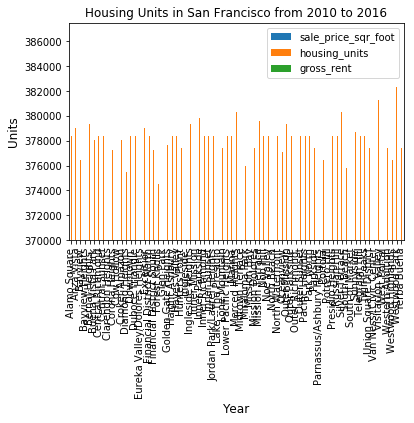

<Figure size 432x288 with 0 Axes>

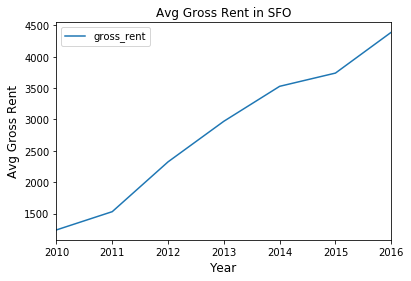

<Figure size 432x288 with 0 Axes>

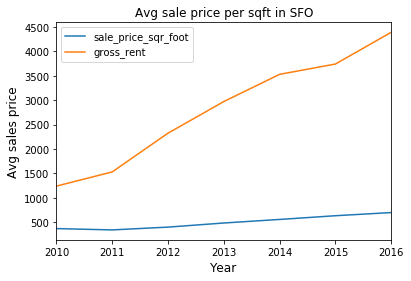

In [308]:
opening_column = pn.Column('## Big Picture ',housing_units_per_year(),average_gross_rent(),average_sales_price(),parallel_coordinates(),parallel_categories())
neighborhood_column = pn.Column('## Pick Your Neighborhood',average_price_by_neighborhood(),top_most_expensive_neighborhoods(),neighborhood_map())


In [309]:
# creating dashboard
crime_pop_dashboard = pn.Tabs(
    ("Welcome", opening_column), ("Neighborhood Visualization", neighborhood_column)
)

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure, tight=True)
        [2] Matplotlib(Figure, tight=True)
        [3] Matplotlib(Figure, tight=True)
        [4] Plotly(Figure)
        [5] Plotly(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [2] HoloViews(Bars)
        [3] Plotly(Figure)
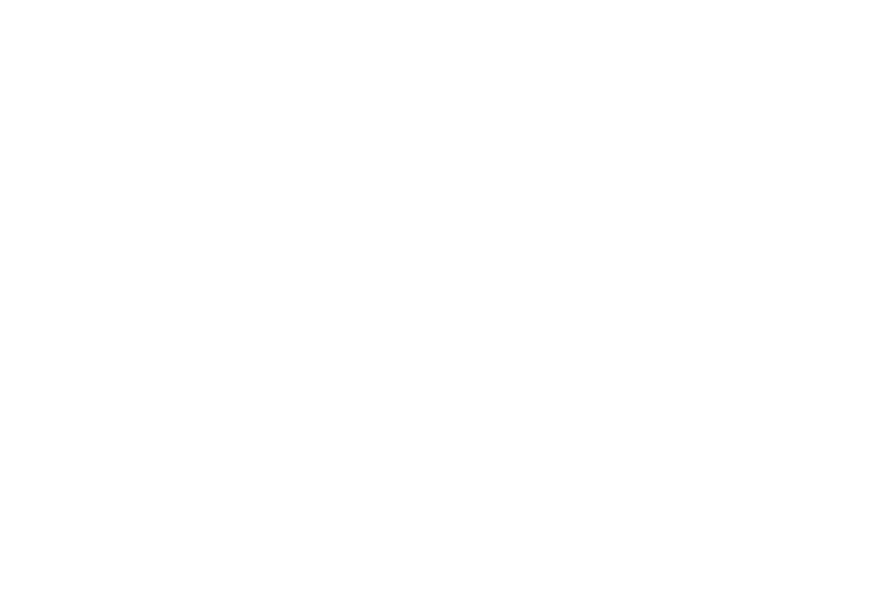
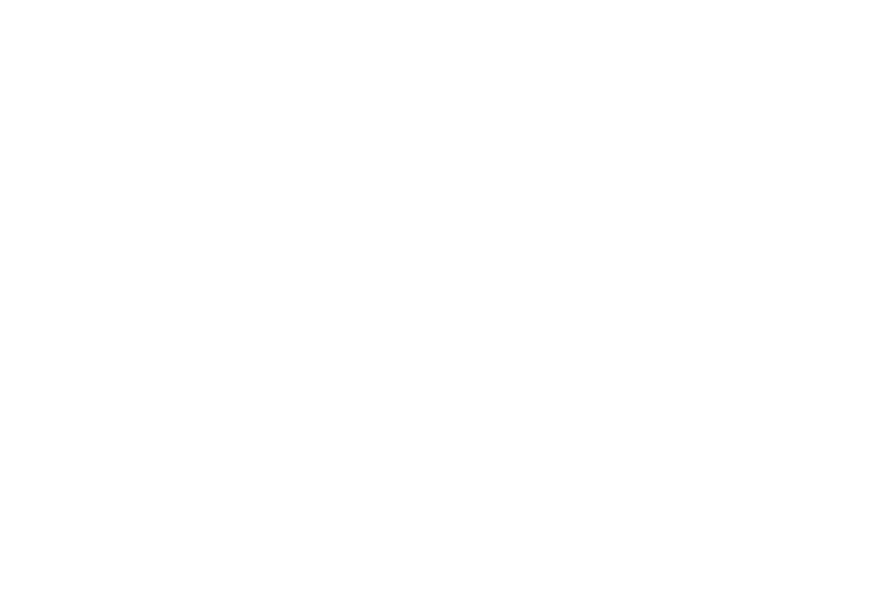
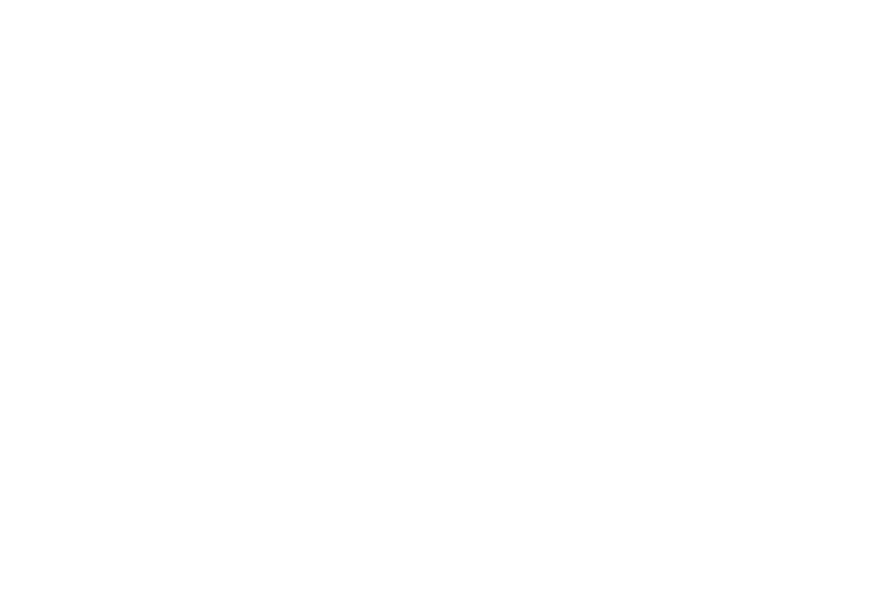

In [310]:
crime_pop_dashboard.servable()